In [1]:
from utils.dice_loss import *
from models.Flat_MoE import *
import torch
import torch.nn as nn
import torch.optim as optim
import torchviz

# Define a dummy CNN model
class DummyCNN(nn.Module):
    def __init__(self):
        super(DummyCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)  # Assuming input images are 32x32
        self.fc2 = nn.Linear(128, 10)  # 10 output classes
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.flatten(x, 1)  # Flatten all dimensions except batch
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Initialize model, loss function, and optimizer
model = Flat_MoE(3, 3)
model = model.train()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Dummy input (batch of 8 RGB images of size 32x32) and target
x = torch.randn(1, 3, 224, 224)  # 8 images, 3 channels, 32x32 size
target = torch.rand(1, 1, 224, 224)  # 8 labels for 10 classes

# Forward pass
output, pms = model(x)
loss = criterion(output, target)

# Backward pass
loss.backward()

# Check gradient flow for each layer
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Layer: {name}")
        print(f"Gradient Mean: {param.grad.mean().item():.6f}")
        print(f"Gradient Std Dev: {param.grad.std().item():.6f}")
        print()


Layer: expert_list.0.encoder.0.weight
Gradient Mean: -0.000008
Gradient Std Dev: 0.000282

Layer: expert_list.0.encoder.0.bias
Gradient Mean: -0.000062
Gradient Std Dev: 0.001677

Layer: expert_list.0.encoder.2.weight
Gradient Mean: 0.000059
Gradient Std Dev: 0.001403

Layer: expert_list.0.encoder.2.bias
Gradient Mean: 0.000257
Gradient Std Dev: 0.005937

Layer: expert_list.0.decoder.0.weight
Gradient Mean: -0.000039
Gradient Std Dev: 0.001663

Layer: expert_list.0.decoder.0.bias
Gradient Mean: -0.000444
Gradient Std Dev: 0.014974

Layer: expert_list.0.decoder.2.weight
Gradient Mean: 0.019080
Gradient Std Dev: 0.020595

Layer: expert_list.0.decoder.2.bias
Gradient Mean: 0.500784
Gradient Std Dev: nan

Layer: expert_list.1.encoder.0.weight
Gradient Mean: -0.000001
Gradient Std Dev: 0.000278

Layer: expert_list.1.encoder.0.bias
Gradient Mean: -0.000019
Gradient Std Dev: 0.001435

Layer: expert_list.1.encoder.2.weight
Gradient Mean: -0.000065
Gradient Std Dev: 0.001361

Layer: expert_list

C:\Users\prana\AppData\Local\Temp\ipykernel_18240\122974189.py:46: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\ReduceOps.cpp:1808.)
  print(f"Gradient Std Dev: {param.grad.std().item():.6f}")


AttributeError: 'NoneType' object has no attribute 'mean'

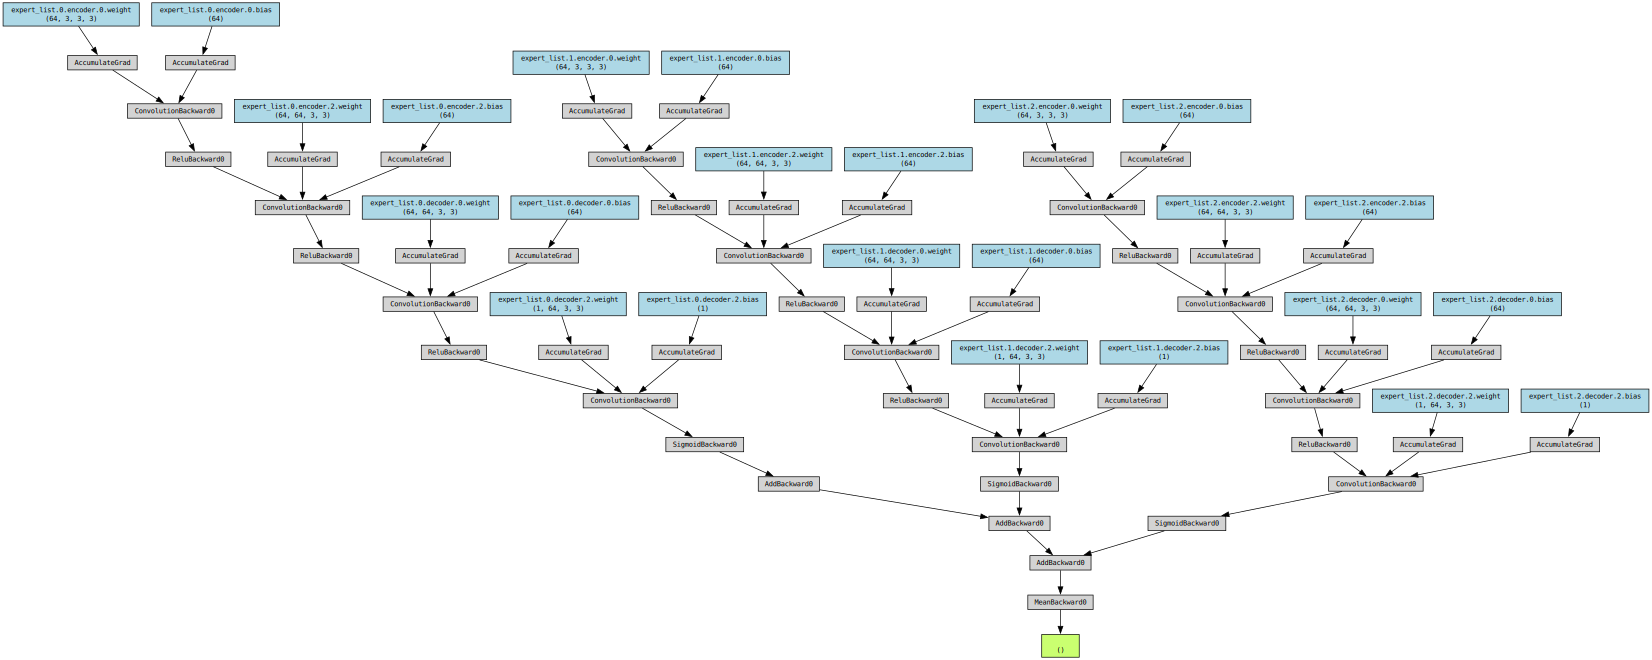

In [2]:
torchviz.make_dot(output.mean(), params=dict(model.named_parameters()))

In [23]:
print(model)

Flat_MoE(
  (expert_list): ModuleList(
    (0-2): 3 x Expert(
      (encoder): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU()
      )
      (decoder): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): Sigmoid()
      )
    )
  )
  (router_list): ModuleList(
    (0-2): 3 x Router(
      (router_layer): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Flatten(start_dim=1, end_dim=-1)
        (3): Linear(in_features=3211264, out_features=64, bias=True)
        (4): ReLU()
        (5): Linear(in_features=64, out_features=1, bias=True)
        (6): Sigmoid()
      )
    )
  )
)
